## Exploration of Food Outlet

Using the `osmnx` package, we scanned through ths geographical area of England and obtain a list of food stores in the UK. In this notebook, we will inspect the dataframe and observe the quality of the dataframe. The data is loaded on 17th March 2024.

In [1]:
import geopandas as gpd 
import pandas as pd 
import numpy as np

# import osm package
from OSMPythonTools.api import Api
import osmnx

## Load the Data
Two geospatial datasets are loaded into the environment:
* Supermarket Locations
* England Country Shape

<Axes: >

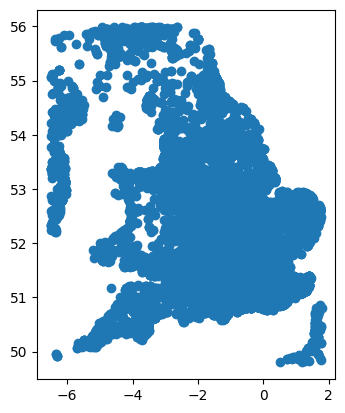

In [6]:
# load the geojson for the supermarket locations
food_store = gpd.read_file("./data/amenities_supermarket.geojson")
food_store.plot()

<Axes: >

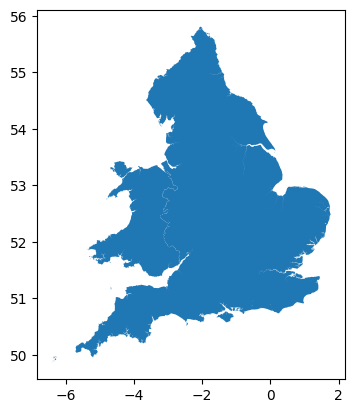

In [3]:
# define the bbox of england
country_bound_url = "https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Countries_December_2021_GB_BGC_2022/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
gdf_country = gpd.read_file(country_bound_url)
# define the boundary box using the geography of England
eng_wal_bound = gdf_country [gdf_country["CTRY21NM"].isin(["England","Wales"])]
bbox = eng_wal_bound.bounds
# exploratory plot
eng_wal_bound.plot()

## Data Preprocessing

In [25]:
# check the crs consistency
print(f"The CRS across the geospatial data is consistent: {food_store.crs == eng_bound.crs}, using {food_store.crs}")

The CRS across the geospatial data is consistent: True, using EPSG:4326


In [26]:
# inspect the data frame for the OSM data
food_store.head()

,name,name:en,shop,addr:city,brand,geometry
0,Foley's,Foley's,convenience,None,None,POINT (-6.48898 52.24271)
1,Roches,Roches,convenience,Wexford,None,POINT (-6.45848 52.29992)
2,Centra,None,convenience,Killinick,Centra,"POLYGON ((-6.45588 52.25757, -6.45629 52.25744..."
3,Boggans,None,convenience,Wexford,None,"POLYGON ((-6.46306 52.28062, -6.46308 52.28062..."
4,Lidl,None,supermarket,Wexford,Lidl,POINT (-6.48039 52.32901)


From the above chunk, we obsere that the geospatial data is encoded in different geometry types, including `Shapely.Point` and `Shapely.Polygon`. The shops can be classified into one of the following three types:
* Convenience
* Supermarket
* Groceries

Although there are data points that fall beyond the boundary of England and Wales, it will only increase the storage required when processing but will not affect the outcome of the food desert specification. We skipped the step here because it requires over 40 minutes to filter away the minority of observation in the dataset. Alternatively, this could be executed using other tools, including QGIS.

In [7]:
# Assuming your GeoPandas Series is called 'geometry_series'
def convert_to_points(geometry):
    """
    Return the centroid of the geometry if not point type
    """
    if geometry.geom_type == 'Point':
        return geometry
    else:
        return geometry.centroid

# Apply the conversion function to each element in the Series
converted_series = food_store.geometry.apply(convert_to_points)

In [10]:
# update the geometry of the gdf
food_store["geometry"] = converted_series 
# save the processed data
food_store.to_file("./data/amenities_supermarket_processed.geojson", driver="GeoJSON")